In [1]:
# ignore future warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import function as f

# Module One Discussion: Descriptive Statistics and Plots

This notebook will take you step-by-step through the calculations required for your Module One discussion post. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions about this activity in the discussion for this module.

Reminder: If you have not already reviewed the discussion prompt, please do so before beginning this activity. That will give you an idea of the questions you will need to answer with the outputs of this script.

## Initial post (due Thursday)

### Step 1: Preparing the dataset
This block of Python code will generate the sample data in a Python dataframe that will be used in the calculations later. Your task is to use a website to collect the daily maximum temperature data for your city or zip code for the past fourteen days. Then, input your data in the code below by filling in the Python list. After entering your data in the Python list, click the code section below and hit the **Run** button above.

In [3]:
temperatures_df = f.dal_temps()


Dallas, TX 14 Day Forecast

Temp (°F)
     36.0
     36.0
     44.0
     41.0
     44.0
     45.0
     53.0
     61.0
     63.0
     58.0
     58.0
     55.0
     52.0
     56.0


## ______________________________________________________________________

### Step 2: Calculating descriptive statistics
The block of code below will calculate descriptive statistics for the data set you entered. The pandas dataframe has several methods that calculate descriptive statistics. Each method has a comment telling you what that method calculates.

Click the code section below and hit the **Run** button above.

In [4]:
f.calc_des_stats(temperatures_df, 'Temp (°F)')

Descriptive Statistics for Temp (°F)
---------------------------------------
Mean = 50.14
Median = 52.5
Variance = 81.67
Standard Deviation = 9.04

Describe Method Output
----------------------
count    14.000000
mean     50.142857
std       9.037164
min      36.000000
25%      44.000000
50%      52.500000
75%      57.500000
max      63.000000
Name: Temp (°F), dtype: float64


## ______________________________________________________________________

### Step 3: Line graph to display trend
The block of code below will create a line plot of temperature data. You will use the matplotlib.pyplot submodule to create the line chart. 

Click the code section below and hit the **Run** button above.  
NOTE: If the graph is not created, click the code section and hit the **Run** button again.

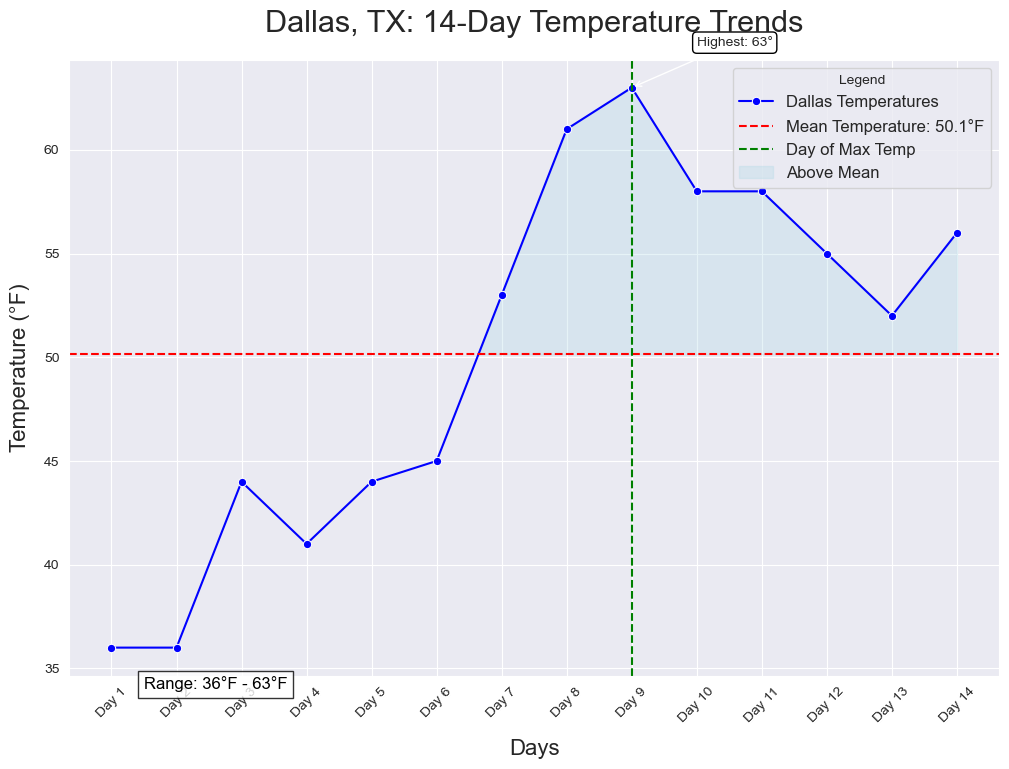

In [5]:
f.plot_temperature_trends(temperatures_df, 'Temp (°F)')

## ______________________________________________________________________

### Step 4: Side-by-side boxplots to compare distributions
The block of code below will create side-by-side boxplots of your temperature data and the temperature data from another location called "Zion". Boxplots can be used to visually compare data distributions. In this code block, you will use the seaborn module in Python to create a side-by-side boxplot. 

The temperature data for Zion will be generated automatically in the code section below. You are not required to know how this data was generated. Note that the temperature data for Zion will be unique to you.

Click the code section below and hit the **Run** button above.  
NOTE: If the graph is not created, click the code section and hit the **Run** button again.

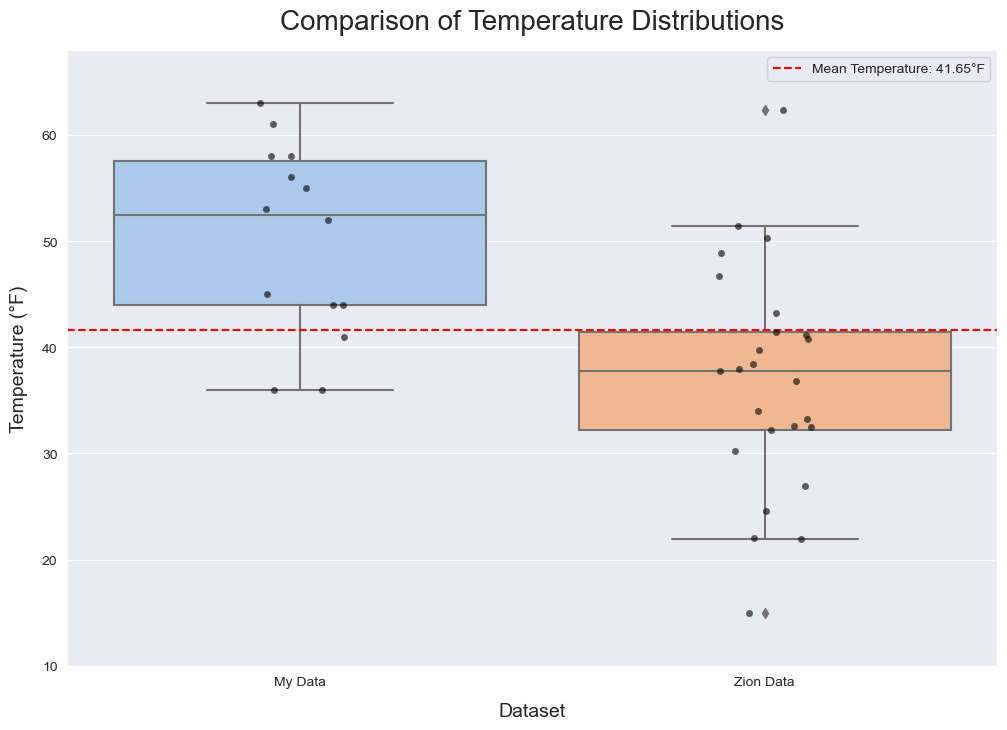

In [6]:
f.plot_temperature_comparison(temperatures_df, 'Temp (°F)')

## ______________________________________________________________________

## End of initial post
Attach the html output to your initial post in the Module One discussion. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all questions about this activity in the Module One discussion.

## Follow-up posts (due Sunday)
Return to the Module One discussion to answer the follow-up questions in your response posts to other students. There are no Python scripts to run for your follow-up posts.